<a href="https://colab.research.google.com/github/mouali-web/MPM_200_ALi/blob/main/notebooks/MPM200_Session5_HW_MAli_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [4]:
install.packages('beepr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library (beepr)

In [6]:
beep("MARIO")

Warning message in beep("MARIO"):
“"MARIO" is not a valid sound nor path, playing a random sound instead.”
Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


In [7]:
install.packages('Tidyverse')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘Tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘tidyverse’ ?”


In [8]:
install.packages( "dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
install.packages("sjPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




In [12]:
#-------Reading the Hummingbird csv file----#
Hummingbird = read.csv("/Hummingbird_data.csv")

In [14]:
colnames(Hummingbird)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [15]:
#nrow(Hummingbird)=6908rows, ncol(Hummingbird)= 12 columns, # your code answer here
nrow(Hummingbird)

[1] 6908

In [16]:
ncol(Hummingbird)

[1] 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [17]:
str(Hummingbird)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [19]:
lapply(Hummingbird, class)

$Admitted
[1] "character"

$Disposition_binary
[1] "character"

$Place
[1] "character"

$F_Aid
[1] "character"

$Species_e
[1] "character"

$Sex_e
[1] "character"

$Age_e
[1] "character"

$Brought_in_after
[1] "integer"

$season
[1] "character"

$r
[1] "character"

$Green_Orange
[1] "character"

$ID
[1] "character"

In [18]:
# Identify data types of each column
data_types = sapply(Hummingbird, class)
print(Hummingbird)

       Admitted Disposition_binary         Place F_Aid       Species_e
1      1/2/1991               Died       Lindsey    No            ANHU
2      1/2/1991           Released       Lindsey   Yes            ANHU
3      1/4/1991               Died       Lindsey    No            ANHU
4      1/5/1991               Died       Lindsey    No            ANHU
5      1/5/1991               Died       Lindsey    No            ANHU
6      1/5/1991               Died       Lindsey    No            ANHU
7      1/6/1991               Died       Lindsey    No            ANHU
8      1/7/1991               Died       Lindsey    No            ANHU
9      1/8/1991               Died       Lindsey    No            ANHU
10    1/11/1991               Died       Lindsey    No            ANHU
11    1/13/1991               Died       Lindsey    No            ANHU
12    1/14/1991               Died       Lindsey    No            ANHU
13    1/21/1991               Died       Lindsey    No            ANHU
14    

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [20]:
library(dplyr)
model_data = sample_n(Hummingbird, 5000)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

Number of rows= 5000
Number of Columns= 12

In [21]:
nrow(model_data)

[1] 5000

In [22]:
ncol(model_data)

[1] 12

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

Categorical variables=11
Continous variables= 1

In [23]:
str(model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : chr  "11/9/2002" "9/30/1995" "7/3/1995" "3/1/1993" ...
 $ Disposition_binary: chr  "Released" "Died" "Released" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "Yes" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "Non-selasphorus" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "unknown" ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "Nestling" ...
 $ Brought_in_after  : int  0 0 0 0 0 0 1 1 0 0 ...
 $ season            : chr  "Fall" "Fall" "Summer" "Spring" ...
 $ r                 : chr  "window hit" "found on the ground" "unknown" "nest-related" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "2348_ANHU" "928_ANHU" "890_ANHU" "386_ANHU" ...


In [24]:
lapply(model_data, class)

$Admitted
[1] "character"

$Disposition_binary
[1] "character"

$Place
[1] "character"

$F_Aid
[1] "character"

$Species_e
[1] "character"

$Sex_e
[1] "character"

$Age_e
[1] "character"

$Brought_in_after
[1] "integer"

$season
[1] "character"

$r
[1] "character"

$Green_Orange
[1] "character"

$ID
[1] "character"

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [25]:
write.csv(model_data, "model_data.csv")

In [26]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [27]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4127
Santa Barbara,62
malibu,811


In [28]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [29]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

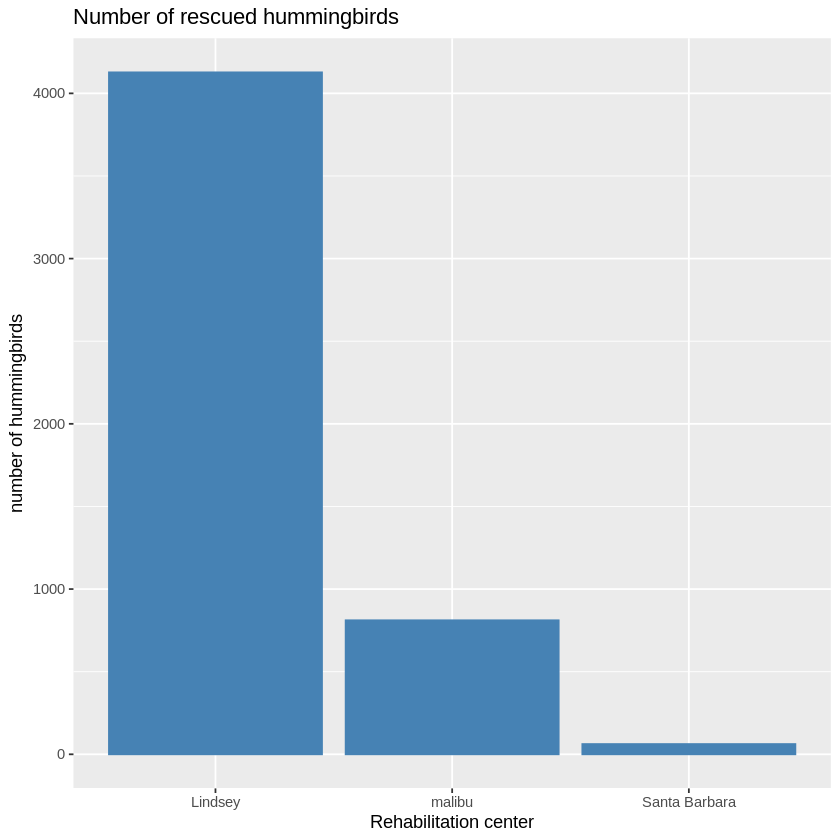

In [30]:
p

In [31]:
pdf("Bird.pdf", width=4, height=3); print(p); dev.off()

agg_record_2091110378 
                    2

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

rehab = model_data %>%: Creates a new object called rehab to store the results - Starts with original dataset “model_data”- The %>% passes the data to the next function
group_by(Place) %>%: Groups the data by the Place column (rehabilitation center names)
summarise(count = n_distinct(ID)): Collapses each group into a single summary row
 p =:  Saves the plot as an object called p
2ggplot(rehab, aes(x = Place, y = count)): ggplot() - initializes the plot using the ggplot2 package
rehab - uses the rehab dataset (the summary table you created earlier)
aes(x = Place, y = count) - sets the aesthetics (what goes where): x = Place - rehabilitation center names go on the x-axis (horizontal),  y = count - number of hummingbirds go on the y-axis (vertical)
geom_bar() - creates a bar chart
stat="identity" - tells ggplot to use the actual count values
color = 'steelblue' - sets the outline/border color of bars to steelblue
fill = 'steelblue' - sets the inside/fill color of bars to steelblue


# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

In [32]:
colnames(model_data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

Covariates that might affect the survival: Place, Species, Age, Sex, Season

In [33]:
sex_survival <- model_data %>%
  select(Sex_e, Disposition_binary, ID) %>%
  distinct() %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = 'drop')


In [35]:
print("Sex_e vs Survival:")
print(sex_survival)

[1] "Sex_e vs Survival:"
# A tibble: 6 × 3
  Sex_e          Disposition_binary count
  <chr>          <chr>              <int>
1 "Female-like " Died                2336
2 "Female-like " Released             931
3 "Male"         Died                 438
4 "Male"         Released             114
5 "unknown"      Died                 432
6 "unknown"      Released             749


In [36]:
p = ggplot(sex_survival, aes(x = Sex_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
facet_grid(. ~ Disposition_binary) +
xlab('Sex')+ ylab('number of hummingbirds')+
labs(title = "Sex vs Survival")

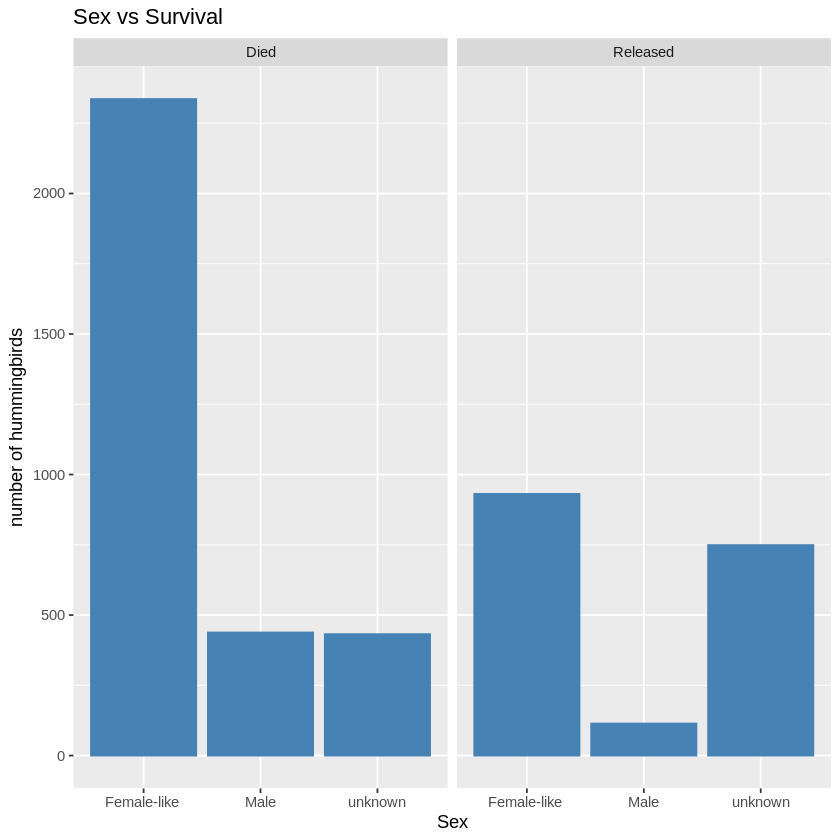

In [37]:
p

In [38]:
Place_survival <- model_data %>%
  select(Place, Disposition_binary, ID) %>%
  distinct() %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = 'drop')

In [39]:
print("Place vs Survival:")
print(Place_survival)

[1] "Place vs Survival:"
# A tibble: 6 × 3
  Place         Disposition_binary count
  <chr>         <chr>              <int>
1 Lindsey       Died                2669
2 Lindsey       Released            1458
3 Santa Barbara Died                  33
4 Santa Barbara Released              29
5 malibu        Died                 504
6 malibu        Released             307


In [40]:
p = ggplot(Place_survival, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
facet_grid(. ~ Disposition_binary) +
xlab('Place')+ ylab('number of hummingbirds')+
labs(title = "Place vs Survival")

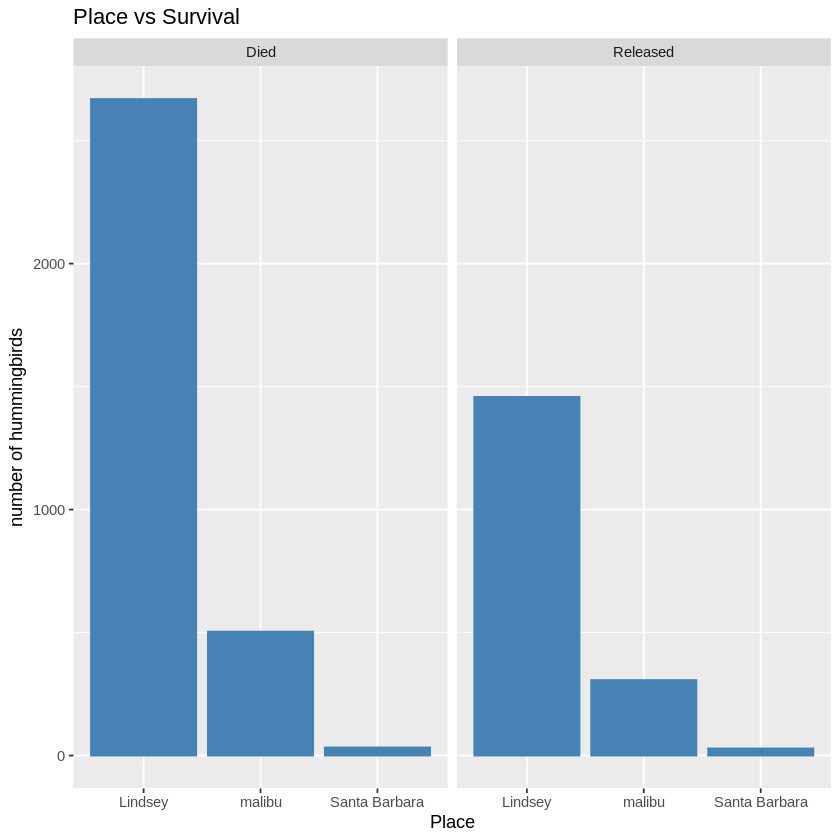

In [41]:
p

In [42]:
season_survival <- model_data %>%
  select(season, Disposition_binary, ID) %>%
  distinct() %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = 'drop')

In [43]:
print("season vs Survival:")
print(season_survival)

[1] "season vs Survival:"
# A tibble: 8 × 3
  season Disposition_binary count
  <chr>  <chr>              <int>
1 Fall   Died                 381
2 Fall   Released              58
3 Spring Died                1318
4 Spring Released             953
5 Summer Died                 955
6 Summer Released             594
7 Winter Died                 552
8 Winter Released             189


In [44]:
p = ggplot(season_survival, aes(x = season, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
facet_grid(. ~ Disposition_binary) +
xlab('Season')+ ylab('number of hummingbirds')+
labs(title = "Season vs Survival")

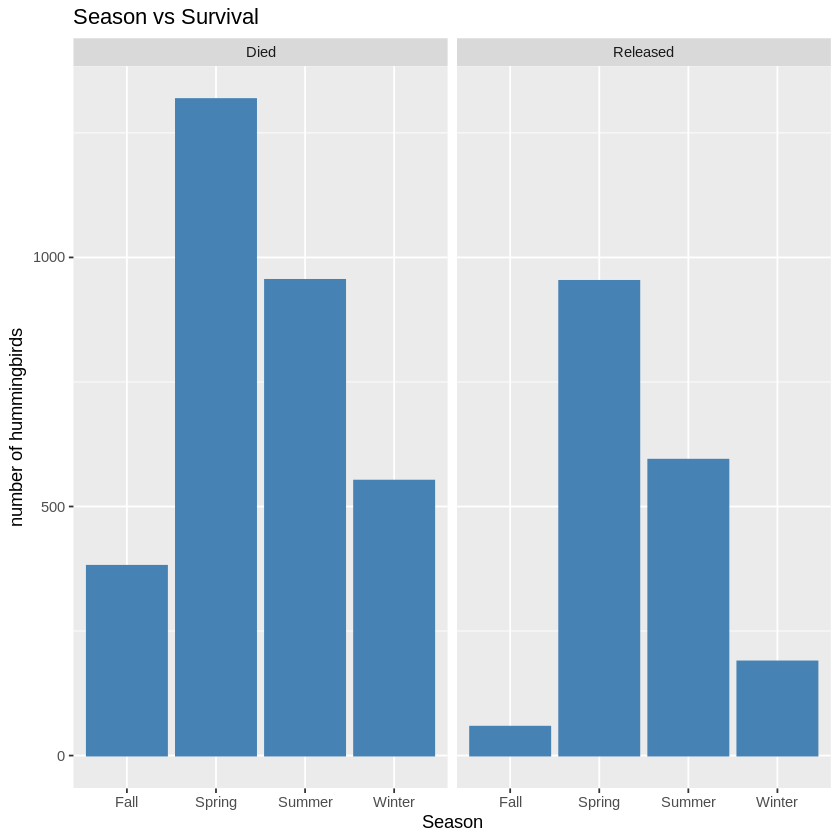

In [46]:
p

In [45]:
Species_survival <- model_data %>%
  select(Species_e, Disposition_binary, ID) %>%
  distinct() %>%
  group_by(Species_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = 'drop')

In [48]:
print("Species_e vs Survival:")
print(Species_survival)

[1] "Species_e vs Survival:"
# A tibble: 8 × 3
  Species_e       Disposition_binary count
  <chr>           <chr>              <int>
1 ANHU            Died                2291
2 ANHU            Released             845
3 BCHU            Died                  22
4 BCHU            Released              13
5 Non-selasphorus Died                 350
6 Non-selasphorus Released             612
7 Selasphorus     Died                 543
8 Selasphorus     Released             324


In [47]:
p = ggplot(Species_survival, aes(x = Species_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
facet_grid(. ~ Disposition_binary) +
xlab('Species')+ ylab('number of hummingbirds')+
labs(title = "Species vs Survival")

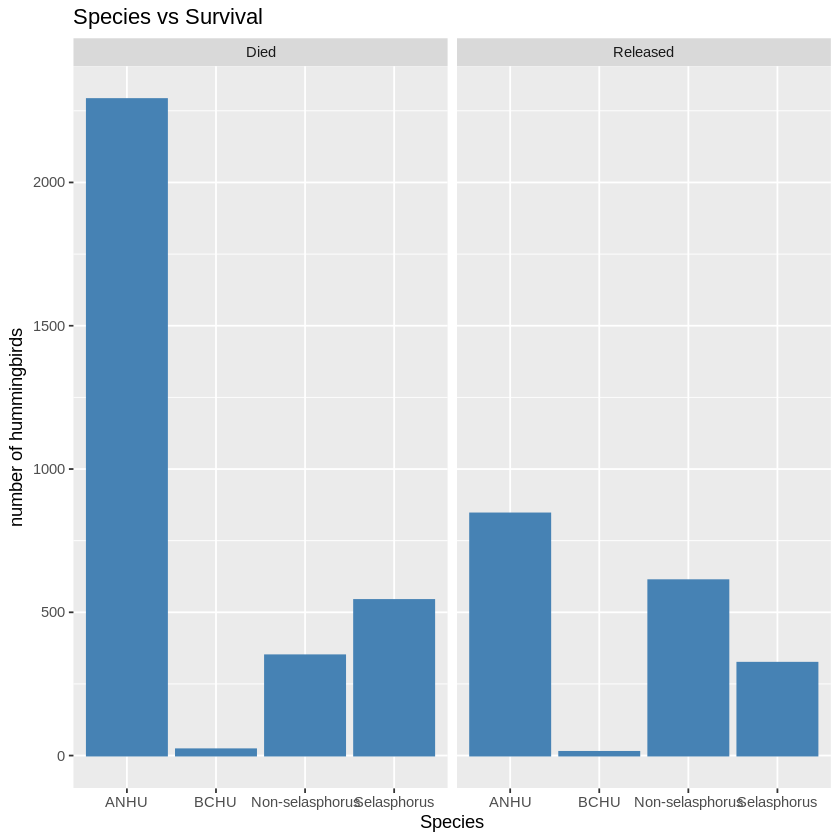

In [50]:
p

In [52]:
Age_survival <- model_data %>%
  select(Age_e, Disposition_binary, ID) %>%
  distinct() %>%
  group_by(Age_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = 'drop')

In [53]:
print("Age_e vs Survival:")
print(Age_survival)

[1] "Age_e vs Survival:"
# A tibble: 4 × 3
  Age_e      Disposition_binary count
  <chr>      <chr>              <int>
1 Nestling   Died                 424
2 Nestling   Released             749
3 adult-like Died                2782
4 adult-like Released            1045


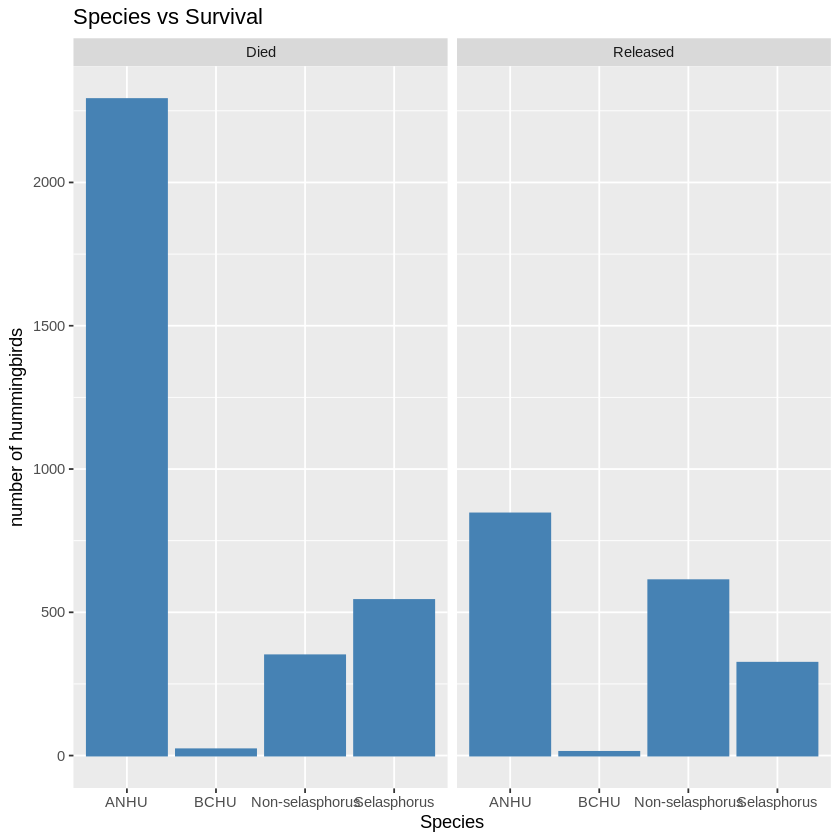

In [54]:
p

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [79]:
df = model_data  %>%
group_by(COLUMN, COLUMN)%>%
summarise(count = n_distinct(COLUMN))

ERROR: [1m[33mError[39m in `group_by()`:[22m
[1m[22m[33m![39m Must group by variables found in `.data`.
[31m✖[39m Column `COLUMN` is not found.


In [57]:
df

function (x, df1, df2, ncp, log = FALSE) 
{
    if (missing(ncp)) 
        .Call(C_df, x, df1, df2, log)
    else .Call(C_dnf, x, df1, df2, ncp, log)
}
<bytecode: 0x5aff6a94b8b8>
<environment: namespace:stats>

In [59]:
p + facet_grid(. ~ FACET_column)+ coord_flip()

ERROR while rich displaying an object: Error in `combine_vars()`:
! At least one layer must contain all faceting variables: `FACET_column`
✖ Plot is missing `FACET_column`
✖ Layer 1 is missing `FACET_column`

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


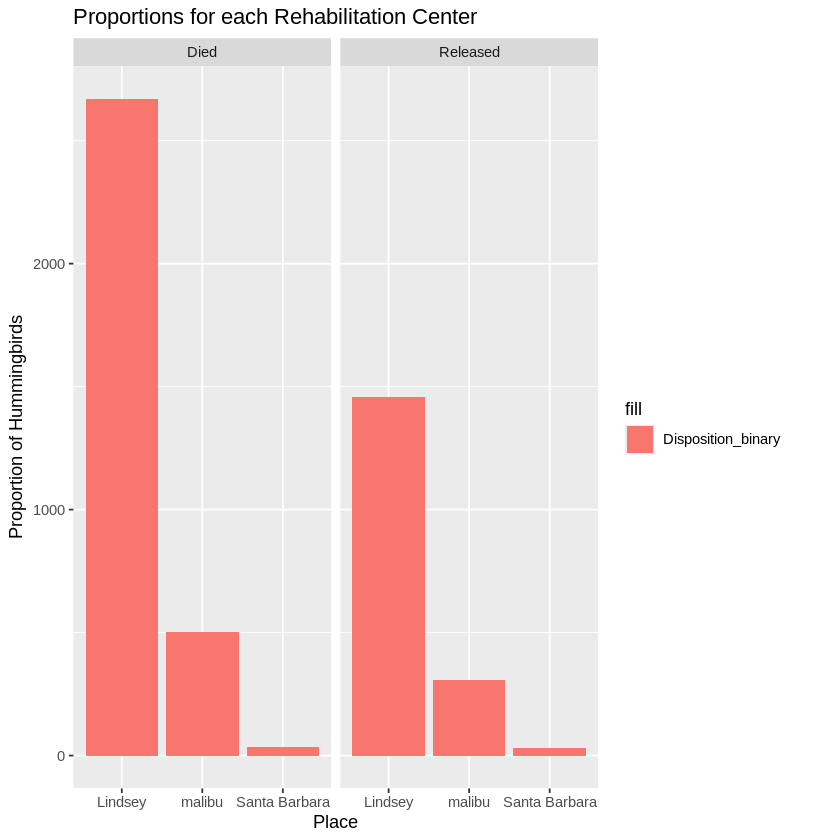

In [69]:
# Calculate proportions
proportions = model_data %>%
  group_by(Disposition_binary, Place) %>%
  summarise(count = n()) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions
ggplot(proportions, aes(x =Place , y = count, fill = "Disposition_binary" )) +
  geom_bar(stat = "identity", position = "dodge") +
   facet_grid(. ~ Disposition_binary) +
   xlab("Place") +
   ylab("Proportion of Hummingbirds") +
   labs(title ='Proportions for each Rehabilitation Center' )


### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

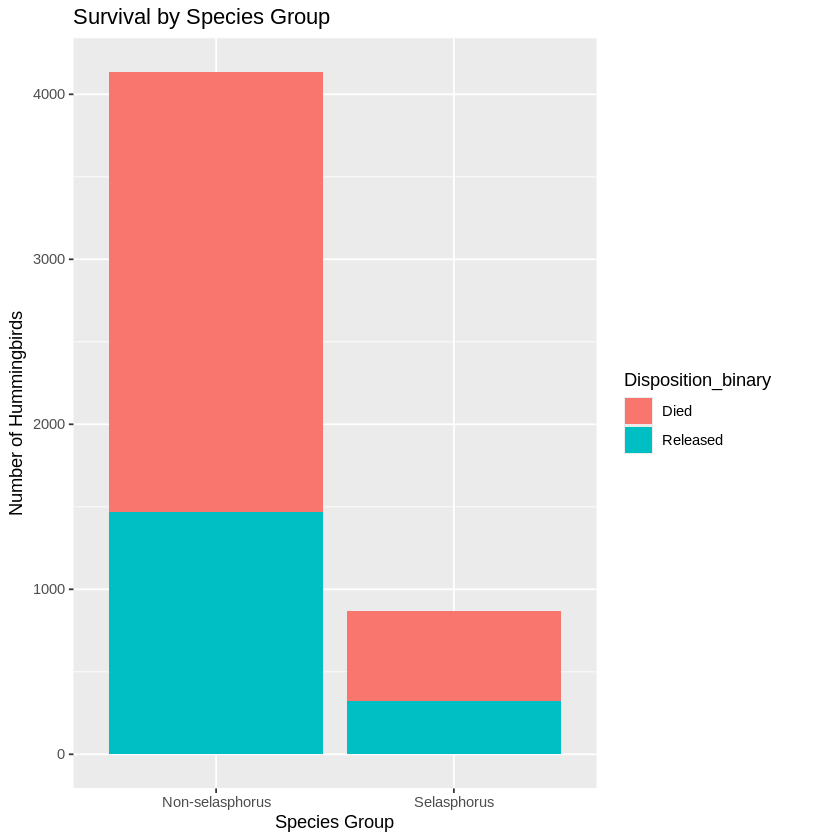

In [70]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e %in% c('ANHU', 'Non-selasphorus', 'BCHU'), "Non-selasphorus",
                           ifelse(model_data$Species_e %in% c('Selasphorus'), "Selasphorus", NA))

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = 'drop')

ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title ="Survival by Species Group" )

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [71]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

Format tells R what each part means (month, day, year, etc.) and how they are separated

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [72]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(total_birds = n())

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(total_birds = n())

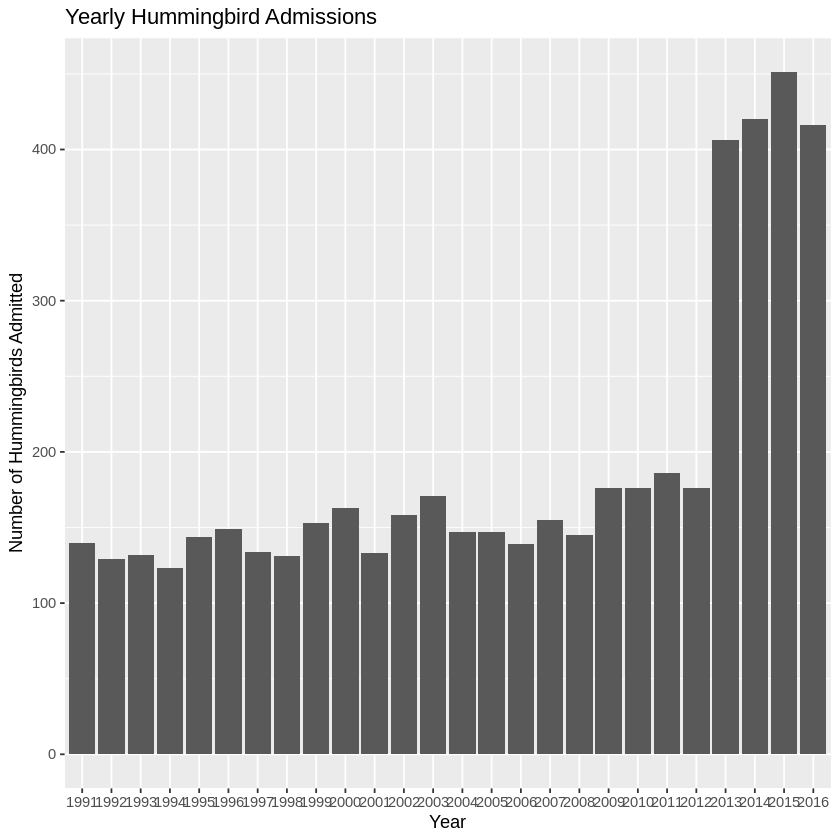

In [73]:
# Plot admissions by year
p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = total_birds)) +
  geom_bar(stat = "identity") +
  xlab("Year") +
  ylab("Number of Hummingbirds Admitted") +
  labs(title = "Yearly Hummingbird Admissions")

p_year

Finally, we can use `ggplot` to plot these timelines.

In [74]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = total_birds)) +
  geom_bar(stat = "identity") +
  xlab("Month") +
  ylab("Number of Hummingbirds Admitted") +
  labs(title = "Monthly Hummingbird Admissions")

In [75]:
# Plot admissions by year
p_month = ggplot(admissions_by_year, aes(x = Admitted_year, y = total_birds)) +
  geom_bar(stat = "identity") +
  xlab("Year") +
  ylab("Number of Hummingbirds Admitted") +
  labs(title = "Yearly Hummingbird Admissions")

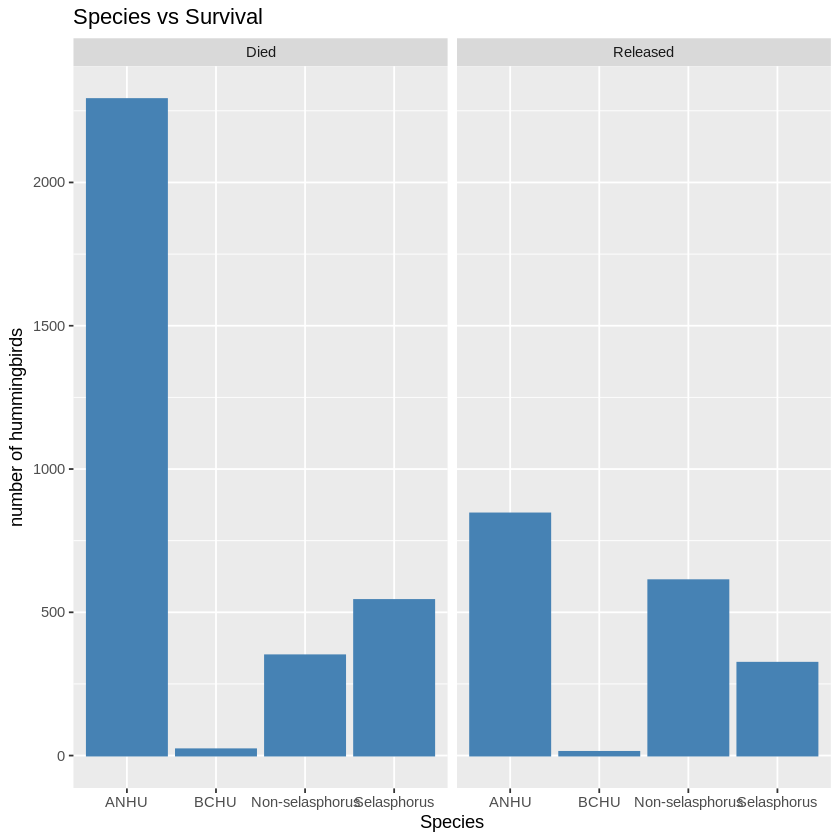

In [66]:
p

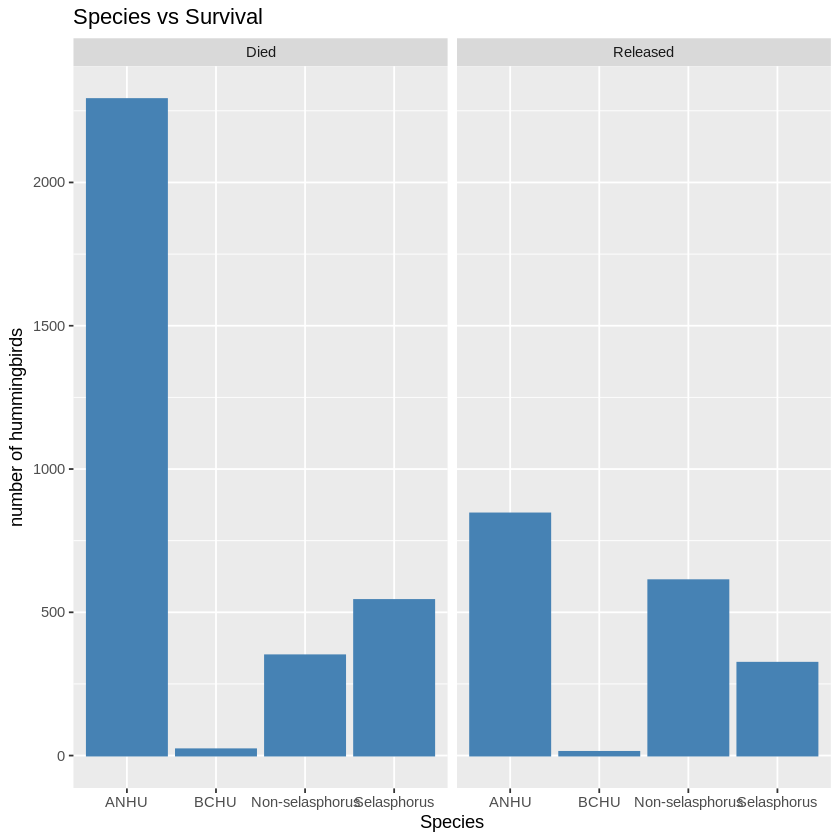

In [65]:
p

In [67]:
## Plot similar timeline for Yearly admissions of Hummingbirds

In [94]:
install.packages('lubridate')
library(lubridate)

# Convert to date format (adjust column name if needed)
model_data = model_data  %>%
  mutate(Admitted_date = as.Date(Admitted_date, format = "%m/%d/%Y"),
Month = floor_date(Admitted_date, "month")   # Extract monthly period
  )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [87]:
# Summarize monthly admissions by species group

monthly_admissions = model_data %>%

  group_by(Month, Species_group) %>%

  summarise(count = n(), .groups = "drop")




Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


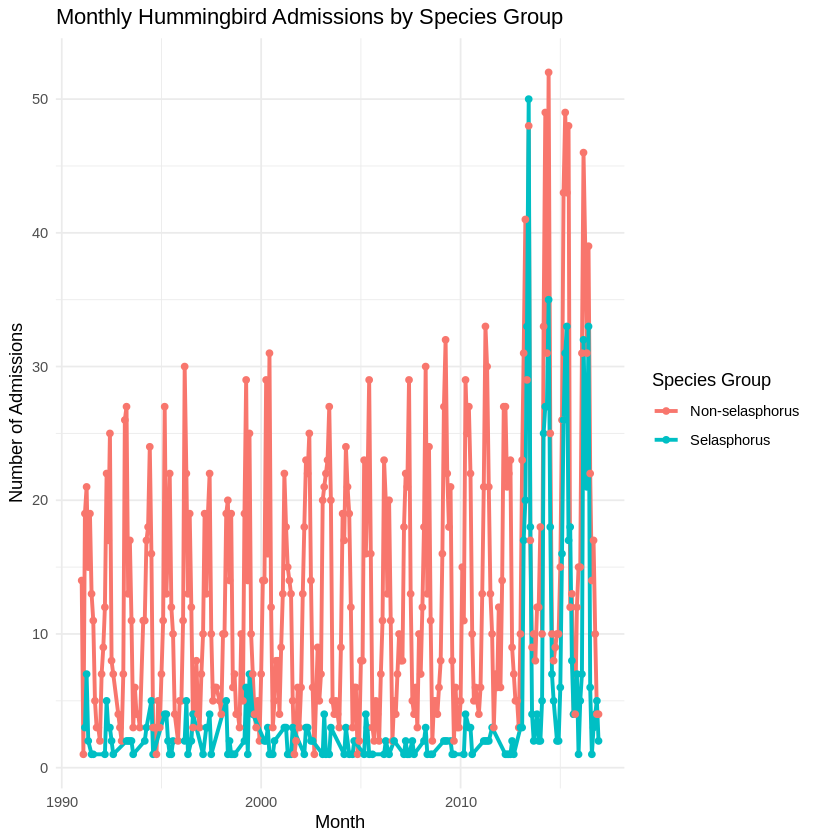

In [88]:
# Timeline plot

ggplot(monthly_admissions, aes(x = Month, y = count, color = Species_group)) +

  geom_line(size = 1.1) +

  geom_point() +

  labs(

    title = "Monthly Hummingbird Admissions by Species Group",

    x = "Month",

    y = "Number of Admissions",

    color = "Species Group"

  ) +

  theme_minimal()

In [110]:
#Section 4: Running full model and model selection#
#Complete the code and fit a full model#

# Convert Disposition_binary to a numeric factor (0 for Died, 1 for Released)
model_data$Disposition_numeric = ifelse(model_data$Disposition_binary == "Released", 1, 0)
fullmodel  = glm(Disposition_numeric ~ r + Green_Orange + season + F_Aid + Species_e, data = model_data, family = binomial(link = "logit"))
fullmodel


Call:  glm(formula = Disposition_numeric ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                    -1.96548                       0.26282  
        rfound on the ground                 rnest-related  
                     0.09106                       0.61693  
  rsuspect torpor-like state                      runknown  
                    -0.99960                       0.34497  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                    -0.11139                       0.22847  
                seasonSpring                  seasonSummer  
                     1.14732                       1.05121  
                seasonWinter                      F_AidYes  
                     0.59977                      -0.11086  
               Species_eBCHU      Species_eNon-selasphorus  
                     0.28959              

In [109]:
glm(formula = Disposition_binary_numeric ~ r + Green_Orange +
    season + F_Aid + Species_e, family = binomial(link = "logit"),
    data = model_data)


Call:  glm(formula = Disposition_binary_numeric ~ r + Green_Orange + 
    season + F_Aid + Species_e, family = binomial(link = "logit"), 
    data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                    -1.96548                       0.26282  
        rfound on the ground                 rnest-related  
                     0.09106                       0.61693  
  rsuspect torpor-like state                      runknown  
                    -0.99960                       0.34497  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                    -0.11139                       0.22847  
                seasonSpring                  seasonSummer  
                     1.14732                       1.05121  
                seasonWinter                      F_AidYes  
                     0.59977                      -0.11086  
               Species_eBCHU      Species_eNon-selasphorus  
                     0.28959  

In [100]:
#use following command with full model to do stepwise model selection#
backward_model = step(fullmodel,k=2,direction = "backward",test="Chisq")
forward_model = step(fullmodel,k=2,direction = "forward",test="Chisq")

Start:  AIC=5977.91
Disposition_binary_numeric ~ r + Green_Orange + season + F_Aid + 
    Species_e


Step:  AIC=5977.91
Disposition_binary_numeric ~ r + season + F_Aid + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
<none>           5949.9 5977.9                      
- F_Aid      1   5952.7 5978.7   2.747   0.09743 .  
- r          6   6006.4 6022.4  56.487 2.321e-10 ***
- season     3   6039.4 6061.4  89.521 < 2.2e-16 ***
- Species_e  3   6124.8 6146.8 174.918 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Start:  AIC=5977.91
Disposition_binary_numeric ~ r + Green_Orange + season + F_Aid + 
    Species_e



In [111]:
summary(backward_model)


Call:
glm(formula = Disposition_binary_numeric ~ r + season + F_Aid + 
    Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.96548    0.16356 -12.017  < 2e-16 ***
rfound inside               0.26282    0.20104   1.307 0.191116    
rfound on the ground        0.09106    0.10303   0.884 0.376810    
rnest-related               0.61693    0.13053   4.727 2.28e-06 ***
rsuspect torpor-like state -0.99960    0.33459  -2.988 0.002812 ** 
runknown                    0.34497    0.11949   2.887 0.003888 ** 
rwindow hit                -0.11139    0.14263  -0.781 0.434821    
seasonSpring                1.14732    0.15068   7.614 2.65e-14 ***
seasonSummer                1.05121    0.15355   6.846 7.60e-12 ***
seasonWinter                0.59977    0.16725   3.586 0.000336 ***
F_AidYes                   -0.11086    0.06700  -1.655 0.097998 .  
Species_eBCHU               

In [101]:

#Section 5: explore the glm object#
names(backward_model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

In [104]:
#explore individual attributes of the fitted model and read about it in the R documentation#
library(sjPlot)
tab_model(backward_model)

In [106]:
library(sjPlot)

tab_model(backward_model)

 Q1: How many model properties are available? 31




In [ ]:
#how many model proprties: 31#
# Q2: Which variable has the highest odds ratio for survival? Species_eNon-selasphorus
# Q3: Do the calculated odds ratios match the values provided by sjPlot? yes it matches.


In [112]:
exp(coef(backward_model))

(Intercept)              rfound inside 
                 0.1400881                  1.3005881 
      rfound on the ground              rnest-related 
                 1.0953343                  1.8532349 
rsuspect torpor-like state                   runknown 
                 0.3680255                  1.4119525 
               rwindow hit               seasonSpring 
                 0.8945890                  3.1497297 
              seasonSummer               seasonWinter 
                 2.8611208                  1.8217050 
                  F_AidYes              Species_eBCHU 
                 0.8950611                  1.3358804 
  Species_eNon-selasphorus       Species_eSelasphorus 
                 3.1916996                  1.2566750